## Importing Header Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint,TensorBoard
%matplotlib inline

## Importing Data

In [82]:
data_set = pd.read_csv("..\Datasets\Apple_Stock_Price.csv")

In [83]:
data_set = data_set.drop(["symbol"],axis=1)
data_set

,date,open,high,low,close,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-05-27 00:00:00+00:00,130.340,132.2600,130.0500,132.045,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.00,1
1,2015-05-28 00:00:00+00:00,131.860,131.9500,131.1000,131.780,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.00,1
2,2015-05-29 00:00:00+00:00,131.230,131.4500,129.9000,130.280,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.00,1
3,2015-06-01 00:00:00+00:00,131.200,131.3900,130.0500,130.535,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.00,1
4,2015-06-02 00:00:00+00:00,129.860,130.6550,129.3200,129.960,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.00,1
5,2015-06-03 00:00:00+00:00,130.660,130.9400,129.9000,130.120,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.00,1
6,2015-06-04 00:00:00+00:00,129.580,130.5800,128.9100,129.360,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.00,1
7,2015-06-05 00:00:00+00:00,129.500,129.6900,128.3600,128.650,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.00,1
8,2015-06-08 00:00:00+00:00,128.900,129.2100,126.8300,127.800,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.00,1
9,2015-06-09 00:00:00+00:00,126.700,128.0800,125.6200,127.420,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.00,1


## Data Pre-processing

In [84]:
date_list = list(data_set['date'])
date_list = [dt.datetime.strptime(date[0:10],'%Y-%m-%d').date() for date in date_list]
len(date_list)

1258

In [88]:
cols = data_set.iloc[:,1:7]

In [89]:
cols = list(cols.drop('volume',axis=1))

In [90]:
cols

['open', 'high', 'low', 'close', 'adjClose']

In [91]:
data_set = data_set[cols].astype(float)

train = data_set.as_matrix()

C:\Users\Sumit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
train.shape

(1258, 5)

In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_scaled = sc.fit_transform(train)
print(train_scaled)
sc_predict = StandardScaler()
sc_predict.fit_transform(train[:,0:1])

[[-0.65750369 -0.64321905 -0.64285248 -0.62783971 -0.69807235]
 [-0.63064392 -0.64861249 -0.62409729 -0.63250289 -0.70223181]
 [-0.64177658 -0.65731158 -0.64553179 -0.65889824 -0.72577591]
 ...
 [ 2.63529253  2.6147645   2.68217447  2.66603573  2.6667012 ]
 [ 2.67028092  2.63860001  2.67627998  2.62415511  2.62616329]
 [ 2.61921201  2.60971903  2.6669917   2.66005279  2.66091007]]


array([[-0.65750369],
       [-0.63064392],
       [-0.64177658],
       ...,
       [ 2.63529253],
       [ 2.67028092],
       [ 2.61921201]])

In [94]:
X_train =[]
y_train =[]
n_future = 60
n_past = 90
for i in range(n_past,len(train_scaled)-n_future+1):
    X_train.append(train_scaled[i-n_past:i,0:data_set.shape[1]-1])
    y_train.append(train_scaled[i+n_future:i+n_future,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1109, 90, 4)
(1109, 0)


## Model-1

In [95]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

In [96]:
model = Sequential()
model.add(LSTM(units = 64,return_sequences = True,input_shape=(n_past,data_set.shape[1]-1)))
model.add(LSTM(units = 50,return_sequences = False))
model.add(Dropout(0.25))
model.add(Dense(units = 1,activation = 'tanh'))
model.compile(optimizer=Adam(learning_rate = 0.01),
             loss = 'mean_squared_error')

In [97]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 90, 64)            17664     
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                23000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 40,715
Trainable params: 40,715
Non-trainable params: 0
_________________________________________________________________


In [98]:
%%time
es = EarlyStopping(monitor = 'val_loss',min_delta=1e-10,patience=10,verbose=1)
rlr = ReduceLROnPlateau(monitor = 'val_loss',factor=0.5,patience=5,verbose=1)
mcp = ModelCheckpoint(filepath='filepath/try.h5',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True)
tb = TensorBoard('filepath')

model.fit(X_train,y_train,
          callbacks=[es,rlr,mcp],
          shuffle=True,
           epochs=10,
           validation_split=0.3,verbose=1,batch_size=256)

Epoch 1/10
4/4 [==============================] - 10s 1s/step - loss: nan - val_loss: nan

Epoch 00001: val_loss did not improve from inf
Epoch 2/10
4/4 [==============================] - 3s 751ms/step - loss: nan - val_loss: nan

Epoch 00002: val_loss did not improve from inf
Epoch 3/10
4/4 [==============================] - 2s 639ms/step - loss: nan - val_loss: nan

Epoch 00003: val_loss did not improve from inf
Epoch 4/10
4/4 [==============================] - 3s 698ms/step - loss: nan - val_loss: nan

Epoch 00004: val_loss did not improve from inf
Epoch 5/10
4/4 [==============================] - 3s 840ms/step - loss: nan - val_loss: nan

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 00005: val_loss did not improve from inf
Epoch 6/10
4/4 [==============================] - 3s 840ms/step - loss: nan - val_loss: nan

Epoch 00006: val_loss did not improve from inf
Epoch 7/10
4/4 [==============================] - 3s 823ms/step - loss: nan - val_

## Model-2

In [103]:
model = Sequential()
model.add(LSTM(64,input_shape=(n_past,data_set.shape[1]-1),return_sequences=True))
model.add(LSTM(30,return_sequences=False))
model.add(Dense(1))

In [104]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [105]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 90, 64)            17664     
_________________________________________________________________
lstm_23 (LSTM)               (None, 30)                11400     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 29,095
Trainable params: 29,095
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=60,verbose=1)

Epoch 1/10
15/15 [==============================] - 11s 357ms/step - loss: nan - val_loss: nan
Epoch 2/10
15/15 [==============================] - 4s 279ms/step - loss: nan - val_loss: nan
Epoch 3/10
15/15 [==============================] - 4s 253ms/step - loss: nan - val_loss: nan
Epoch 4/10
15/15 [==============================] - 4s 247ms/step - loss: nan - val_loss: nan
Epoch 5/10
15/15 [==============================] - 4s 289ms/step - loss: nan - val_loss: nan
Epoch 6/10
15/15 [==============================] - 4s 283ms/step - loss: nan - val_loss: nan
Epoch 7/10
15/15 [==============================] - 4s 286ms/step - loss: nan - val_loss: nan
Epoch 8/10
15/15 [==============================] - 4s 289ms/step - loss: nan - val_loss: nan
Epoch 9/10
15/15 [==============================] - 4s 269ms/step - loss: nan - val_loss: nan
Epoch 10/10
15/15 [==============================] - 4s 277ms/step - loss: nan - val_loss: nan


## Data Prediction

In [99]:
date_future = pd.date_range(date_list[-1],periods=n_future,freq='1d').tolist()

date_future_ = []
for this_timestamp in date_future:
    date_future_.append(this_timestamp.date())

In [100]:
predictions_future = model.predict(X_train[-n_future:])
y_pred_future = sc_predict.inverse_transform(predictions_future)
Pred = pd.DataFrame(y_pred_future,columns=['Open']).set_index(pd.Series(date_future))
Pred.head()

,Open
2020-05-22,189.864273
2020-05-23,189.861710
2020-05-24,189.889984
2020-05-25,189.943481
2020-05-26,190.035141


In [101]:
data_set = pd.DataFrame(data_set,columns=cols)
data_set.index = date_list
data_set.index = pd.to_datetime(data_set.index)

## Analysing Result

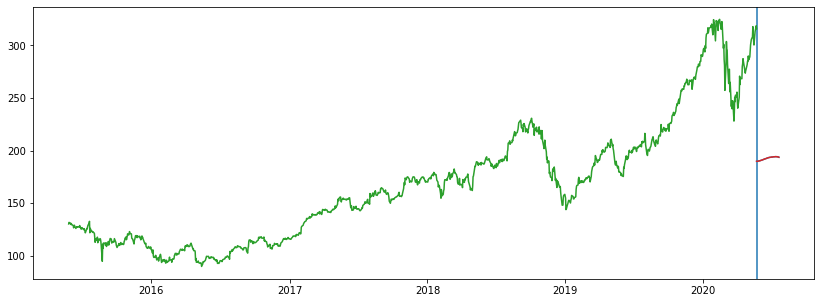

In [102]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,5

Start_Date = '2020-05-22'

plt.plot(Pred.index,Pred['Open'])
plt.plot(data_set.loc[Start_Date:].index,data_set.loc[Start_Date:]['open'])

plt.axvline(x = min(Pred.index))
plt.plot(data_set['open'])
plt.plot(Pred)